In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

### first tryin to get a handle on the data

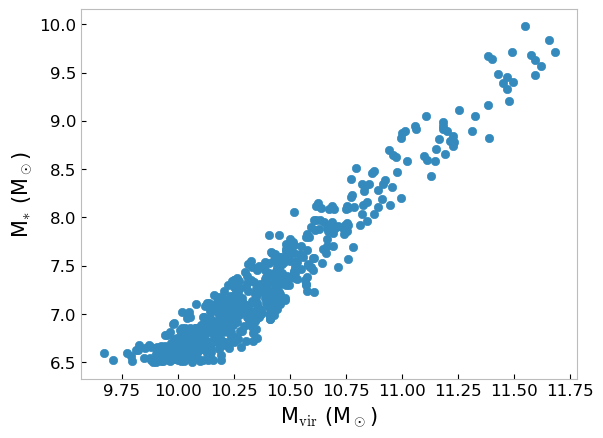

In [3]:
fid_theta = np.array([10.5, 2.0, 0.2, 0, 0, 0])
Ntree = 100
min_mass = 6.5

mock = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/correlation_test/alpha/mock_1/mock_data.npy")
mock.get_stats(min_mass=min_mass)
mock.get_data_points(plot=True)

In [4]:
counts = []
masses = []

for i in mock.lgMs:
    example = np.sort(i)
    temp = example[~np.isnan(example)]
    short = temp[temp > 6.5]
    counts.append(np.arange(len(short)-1, -1, -1))
    masses.append(short)    

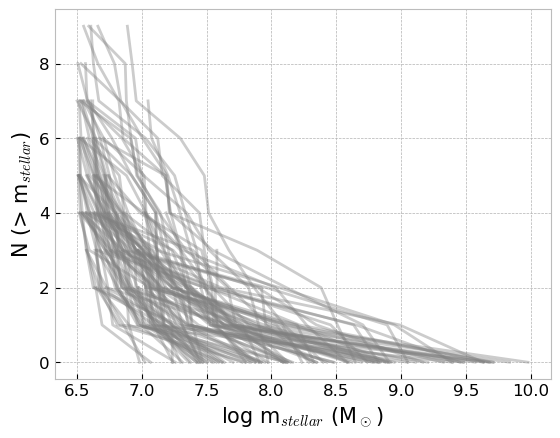

In [5]:
for i, val in enumerate(masses):
    plt.plot(val, counts[i], color="grey", alpha=0.4)

plt.grid()
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.show()

In [6]:
counts

[array([3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([8, 7, 6, 5, 4, 3, 2, 1, 0]),
 array([6, 5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([7, 6, 5, 4, 3, 2, 1, 0]),
 array([7, 6, 5, 4, 3, 2, 1, 0]),
 array([6, 5, 4, 3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([5, 4, 3, 2, 1, 0]),
 array([5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([2, 1, 0]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]),
 array([2, 1, 0]),
 array([7, 6, 5, 4, 3, 2, 1, 0]),
 array([2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([5, 4, 3, 2, 1, 0]),
 array([7, 6, 5, 4, 3, 2, 1, 0]),
 array([2, 1, 0]),
 array([6, 5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([3, 2, 1, 0]),
 array([2, 1, 0]),
 array([7, 6, 5, 4, 3, 2, 1, 0]),
 array([4, 3, 2, 1, 0]),
 array([6, 5, 4, 3, 2, 1, 0]),
 array([2, 1, 0

In [7]:
masses

[array([6.76597326, 6.81658731, 6.99127147, 7.7727677 ]),
 array([6.53909651, 6.75616206, 6.80451448, 6.96603458, 8.12195329]),
 array([6.97227841, 7.23153644, 8.11127492, 9.3267342 ]),
 array([6.98119243, 7.02928494, 7.12697007, 7.37790169]),
 array([6.72121678, 6.72860956, 6.87011848, 7.15415861, 7.86127973,
        8.89156984]),
 array([7.18585077, 7.30069805, 7.51026978, 8.21417495, 9.68383363]),
 array([6.51587514, 6.59481033, 7.06504437, 7.086737  , 7.47054848]),
 array([6.52998621, 6.83392236, 7.12247173, 7.15744899, 7.44435514,
        7.48225625, 7.5486774 , 8.6342159 , 8.826214  ]),
 array([6.57975625, 6.7094265 , 6.83617426, 6.91651157, 7.11524711,
        7.55175927, 7.87331351]),
 array([6.63871334, 7.24111175, 7.48833208, 7.58750096, 8.08697578]),
 array([6.5491825 , 6.70531674, 6.78736231, 6.8943686 , 7.03503476,
        7.35127236, 7.38209608, 8.16342894]),
 array([6.60266275, 6.63450241, 6.71578103, 6.74154417, 6.77892913,
        7.54341063, 7.82325393, 8.12467551]),


In [8]:
def boolean_indexing(v, fillval=np.nan):
    lens = np.array([len(item) for item in v])
    mask = lens[:,None] > np.arange(lens.max())[::-1]
    out = np.full(mask.shape,fillval)
    out[mask] = np.concatenate(v)
    return out

data = boolean_indexing(masses)

In [9]:
countz = np.arange(data.shape[1]-1, -1, -1)

In [10]:
X_vec = np.nanpercentile(data, np.array([15, 50, 85]), axis=0)

In [11]:
countz = np.arange(9, -1, -1)

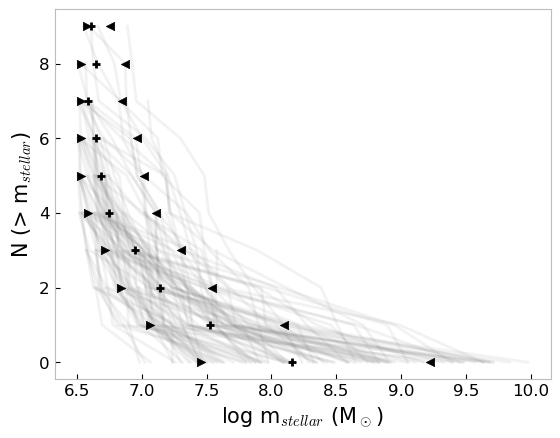

In [12]:
for i, val in enumerate(masses):
    plt.plot(val, counts[i], color="grey", alpha=0.1, zorder=0)

plt.scatter(X_vec[0, :], countz, color="black", marker=">")
plt.scatter(X_vec[1, :], countz, color="black", marker="+")
plt.scatter(X_vec[2, :], countz, color="black", marker="<")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.show()

### now the models

In [13]:
models = jsm_models.load_models("../../../data/MW-analog/meta_data_psi3/")

In [14]:
def forward(theta):
    models.push_theta(theta, jsm_SHMR.general, min_mass, Ntree)
    return models.lgMs

# def lnlike(theta):    
#     model_Pnsat, models_Msmax_sorted, _, models_correlations = forward(theta)
#     lnL_sat = jsm_stats.lnL_Pnsat(model_Pnsat, data.stat.satfreq)
#     lnL_max = jsm_stats.lnL_KS(models_Msmax_sorted, data.stat.Msmax_sorted)
#     lnL_r = jsm_stats.lnL_chi2r(models_correlations, data.stat.r)
#     return np.array([lnL_sat, lnL_max, lnL_r])

In [121]:
test_theta = np.array([10.5, 2.0, 0.2, 0, -0.1, 0])

lgMs_perf = forward(test_theta)

In [122]:
counts = []
masses = []

for i in lgMs_perf:
    example = np.sort(i)
    temp = example[~np.isnan(example)]
    short = temp[temp > 6.5]
    counts.append(np.arange(len(short)-1, -1, -1))
    masses.append(short)    

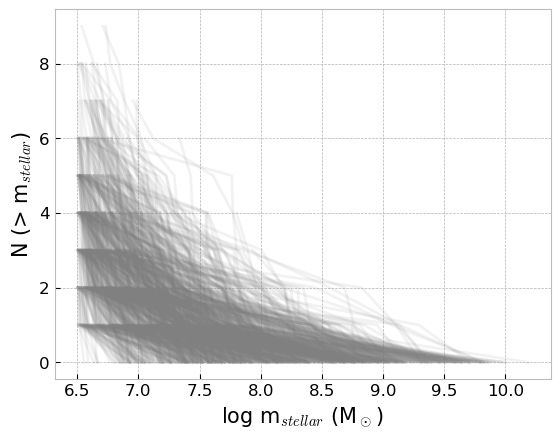

In [123]:
for i, val in enumerate(masses[0:1000]):
    plt.plot(val, counts[i], color="grey", alpha=0.1)

plt.grid()
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.show()

In [124]:
model = boolean_indexing(masses)

In [125]:
X_vec_M = np.nanpercentile(model, np.array([15, 50, 85]), axis=0)

In [126]:
# for i, val in enumerate(masses[0:1000]):
#     plt.plot(val, counts[i], color="grey", alpha=0.1, zorder=0)

# plt.scatter(X_vec_M[0, :], countz, color="red", marker=">")
# plt.scatter(X_vec_M[1, :], countz, color="red", marker="+")
# plt.scatter(X_vec_M[2, :], countz, color="red", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.show()

In [127]:
# countz = np.arange(data.shape[1]-1, -1, -1)

In [128]:
# plt.title()
# plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label="model")

# plt.plot(X_vec[0, :], countz, color="black", marker=">")
# plt.scatter(X_vec[1, :], countz, color="black", marker="+", label="data")
# plt.plot(X_vec[2, :], countz, color="black", marker="<")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
# plt.legend()
# plt.show()

In [129]:
Y_model = X_vec_M[:, -X_vec.shape[1]:]

Y_data = X_vec

In [130]:
Y_data.shape

# 3 variables, each with 10 realizations?

(3, 10)

In [131]:
covariance = np.cov(Y_data, rowvar=1)

inv_covar = np.linalg.inv(covariance)

diff = Y_model - Y_data

chisquare = np.sum(diff.transpose().dot(inv_covar).dot(diff))

In [132]:
chisquare #fid_theta

238.50241300373673

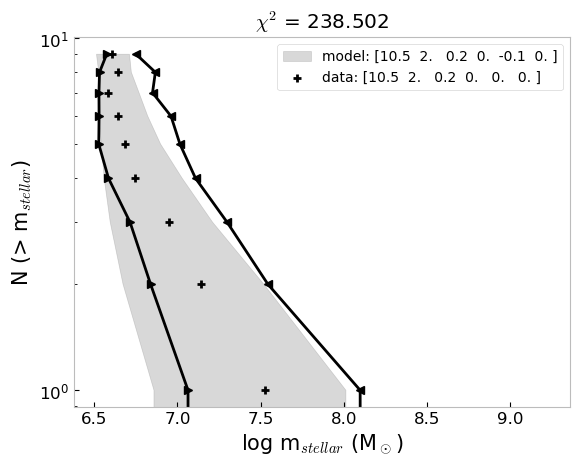

In [134]:
plt.title(f"$\chi^2$ = {chisquare:.6g}")
plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label=f"model: {test_theta}")

plt.plot(X_vec[0, :], countz, color="black", marker=">")
plt.scatter(X_vec[1, :], countz, color="black", marker="+", label=f"data: {fid_theta}")
plt.plot(X_vec[2, :], countz, color="black", marker="<")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.yscale("log")
plt.show()

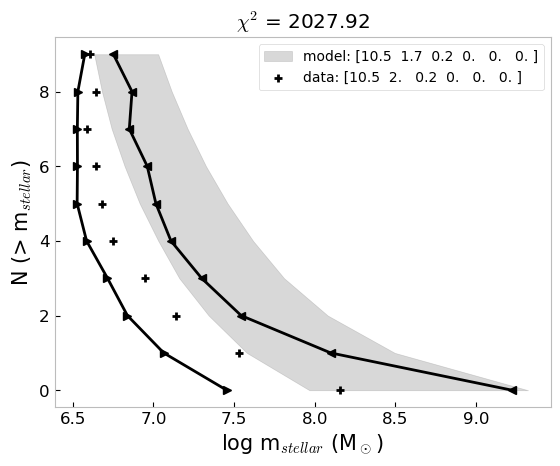

In [108]:
plt.title(f"$\chi^2$ = {chisquare:.6g}")
plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label=f"model: {test_theta}")

plt.plot(X_vec[0, :], countz, color="black", marker=">")
plt.scatter(X_vec[1, :], countz, color="black", marker="+", label=f"data: {fid_theta}")
plt.plot(X_vec[2, :], countz, color="black", marker="<")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

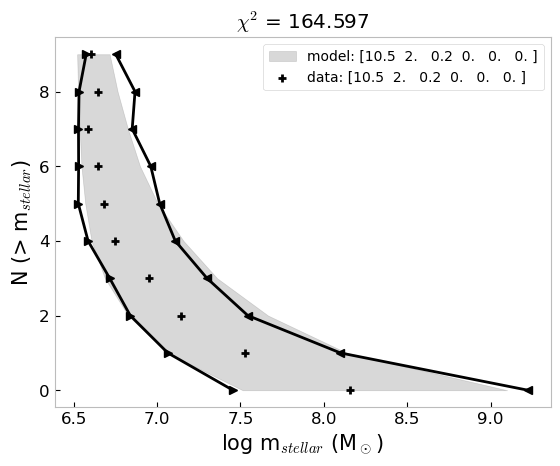

In [27]:
plt.title(f"$\chi^2$ = {chisquare:.6g}")
plt.fill_betweenx(countz, X_vec_M[0, -X_vec.shape[1]:], X_vec_M[2, -X_vec.shape[1]:], color='grey', alpha=0.3, label=f"model: {test_theta}")

plt.plot(X_vec[0, :], countz, color="black", marker=">")
plt.scatter(X_vec[1, :], countz, color="black", marker="+", label=f"data: {fid_theta}")
plt.plot(X_vec[2, :], countz, color="black", marker="<")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

In [28]:
# def lnlike(theta):
#     model = MODEL(theta)
#     X = model - data.D
#     X_vec = np.expand_dims(X, axis=1)
#     chisquare = X_vec.transpose().dot(data.inv_covar).dot(X_vec)
#     return -1/2*np.sum(chisquare)

# self.sampave = np.average(self.D_mat,axis=0)
# self.covariance = np.cov(self.D_mat, rowvar=False)
# self.sampstd = np.sqrt(np.diag(self.covariance))
# self.inv_covar = np.linalg.inv(self.covariance)